In [ ]:
# Question 1

In [6]:
import pandas as pd
import numpy as np

In [7]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')

In [9]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("Mean age per occupation:\n", mean_age_per_occupation)

Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [10]:
def male_ratio(m):
    males = (m['gender'] == 'M').sum()
    total = m['gender'].count()
    return (males / total) * 100

male_ratio_per_occupation = users.groupby('occupation').apply(male_ratio).sort_values(ascending=False)

print("Male ratio per occupation from most to least:\n", male_ratio_per_occupation)

Male ratio per occupation from most to least:
 occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64


In [11]:
min_age_per_occupation = users.groupby('occupation')['age'].min()
max_age_per_occupation = users.groupby('occupation')['age'].max()

age_stats_per_occupation = pd.concat([min_age_per_occupation, max_age_per_occupation], axis=1)
age_stats_per_occupation.columns = ['Min Age', 'Max Age']

print("Age statistics per occupation:\n", age_stats_per_occupation)

Age statistics per occupation:
                Min Age  Max Age
occupation                     
administrator       21       70
artist              19       48
doctor              28       64
educator            23       63
engineer            22       70
entertainment       15       50
executive           22       69
healthcare          22       62
homemaker           20       50
lawyer              21       53
librarian           23       69
marketing           24       55
none                11       55
other               13       64
programmer          20       63
retired             51       73
salesman            18       66
scientist           23       55
student              7       42
technician          21       55
writer              18       60


In [12]:
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean().unstack()

print("Mean age per occupation and sex:\n", mean_age_per_occupation_sex)

Mean age per occupation and sex:
 gender                 F          M
occupation                         
administrator  40.638889  37.162791
artist         30.307692  32.333333
doctor               NaN  43.571429
educator       39.115385  43.101449
engineer       29.500000  36.600000
entertainment  31.000000  29.000000
executive      44.000000  38.172414
healthcare     39.818182  45.400000
homemaker      34.166667  23.000000
lawyer         39.500000  36.200000
librarian      40.000000  40.000000
marketing      37.200000  37.875000
none           36.500000  18.600000
other          35.472222  34.028986
programmer     32.166667  33.216667
retired        70.000000  62.538462
salesman       27.000000  38.555556
scientist      28.333333  36.321429
student        20.750000  22.669118
technician     38.000000  32.961538
writer         37.631579  35.346154


In [13]:
def gender_percentage(gp):
    percentages = gp['gender'].value_counts(normalize=True) * 100
    return percentages

gender_percentage_per_occupation = users.groupby('occupation').apply(gender_percentage)

print("Percentage of women and men per occupation:\n", gender_percentage_per_occupation)

Percentage of women and men per occupation:
 occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
educator       M          72.631579
               F          27.368421
engineer       M          97.014925
               F           2.985075
entertainment  M          88.888889
               F          11.111111
executive      M          90.625000
               F           9.375000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         M          83.333333
               F          16.666667
librarian      F          56.862745
               M          43.137255
marketing      M          61.538462
               F          38.461538
none           M          55.555556
               F          44.444444
other          M          65.7142

In [ ]:
# Question 2

In [14]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

In [15]:
goals = euro12['Goals']
print("Goals column:\n", goals)

Goals column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [16]:
print("Number of teams:", euro12['Team'].nunique())

Number of teams: 16


In [17]:
print("Number of column:", euro12.shape[1])

Number of column: 35


In [18]:
discipline = euro12[['Team','Yellow Cards', 'Red Cards']]
discipline_sorted = discipline.sort_values(by=['Red Cards','Yellow Cards'], ascending=[False, False])

In [19]:
print("The mean Yellow cards given per Team:", discipline['Yellow Cards'].mean())

The mean Yellow cards given per Team: 7.4375


In [20]:
print("Teams that scored more than 6 goals:\n", euro12[euro12['Goals'] > 6]['Team'])

Teams that scored more than 6 goals:
 5     Germany
13      Spain
Name: Team, dtype: object


In [21]:
print("Teams name starting with G:\n", euro12[euro12['Team'].str.startswith('G')]['Team'])

Teams name starting with G:
 5    Germany
6     Greece
Name: Team, dtype: object


In [22]:
print("First 7 columns:\n", euro12.iloc[:, :7])

First 7 columns:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13              

In [23]:
print("All columns except the last 3 columns:\n", euro12.iloc[:, :-3])

All columns except the last 3 columns:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                

In [24]:
print("Shooting accuracy from England, Italy and Russia:\n", euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']])

Shooting accuracy from England, Italy and Russia:
        Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


In [25]:
# Question 3

In [26]:
series1 = pd.Series(np.random.randint(1,5,size=100))
series2 = pd.Series(np.random.randint(1,4,size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

In [27]:
df = pd.concat([series1, series2, series3], axis=1)

df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

In [28]:
bigcolumn = pd.concat([series1, series2, series3], axis=0)
is_true = len(bigcolumn) == 100

print("Is it going only until index 99?\n", is_true)

Is it going only until index 99?
 False


In [29]:
bigcolumn.reset_index(drop= True, inplace= True)
print("Reindexed Dataframe 'bigcolumn':\n", bigcolumn)

Reindexed Dataframe 'bigcolumn':
 0          3
1          4
2          4
3          4
4          1
       ...  
295    20581
296    27449
297    26857
298    15063
299    22727
Length: 300, dtype: int32


In [ ]:
# Question 4

In [35]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from datetime import datetime

# Step 2: Define dataset path
dataset_path = "C:/Users/praja/Documents/wind.txt"

# Step 3: Read data and set index to datetime
data = pd.read_table(dataset_path, sep="\s+")
data.index = pd.to_datetime(data.index)

# Step 4: Fix year to 1961
data.index = data.index.map(lambda x: x.replace(year=1961))

# Step 5: Remove index name
data.index.name = None

# Step 6: Calculate number of missing values per location
nulls_per_location = data.isna().sum()
print("Step 6 - Number of Missing Values per Location:")
print(nulls_per_location)

# Step 7: Calculate total number of non-missing values
total_values = data.count().sum()
print("\nStep 7 - Total Number of Non-Missing Values:", total_values)

# Step 8: Calculate mean windspeed across all locations and times
mean_all = data.mean().mean()
print("\nStep 8 - Mean Windspeed Across All Locations and Times:", mean_all)

# Step 9: Calculate min, max, mean, and std for each location
loc_stats = data.describe().transpose()[['min', 'max', 'mean', 'std']]
print("\nStep 9: Location statistics\n", loc_stats)

# Step 10: Calculate day statistics
day_stats = data.T.describe()
print("\nStep 10 - Day Statistics:")
print(day_stats)

# Step 11: Find the average windspeed in January for each location
january_avg = data[data.index.month == 1].mean()
print("\nStep 11: Average windspeed in January for each location\n", january_avg)

# Steps 12-14: Downsample the record to yearly, monthly, and weekly frequency
data_yearly = data.resample('Y').mean()
data_monthly = data.resample('M').mean()
data_weekly = data.resample('W-Mon').mean()

# Print Steps 12-14
print("\nStep 12: Downsampled to yearly frequency\n", data_yearly)
print("\nStep 13: Downsampled to monthly frequency\n", data_monthly)
print("\nStep 14: Downsampled to weekly frequency\n", data_weekly)

# Step 15: Calculate min, max, mean, and std for each week for the first 52 weeks
weekly_stats = data_weekly.head(52).describe().transpose()[['min', 'max', 'mean', 'std']]
print("\nStep 15: Weekly statistics for the first 52 weeks\n", weekly_stats)


Step 6 - Number of Missing Values per Location:
Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7 - Total Number of Non-Missing Values: 98579

Step 8 - Mean Windspeed Across All Locations and Times: 14.299199599246569

Step 9: Location statistics
        min    max       mean       std
Yr   61.00  78.00  69.500304  5.188131
Mo    1.00  12.00   6.523274  3.448871
Dy    1.00  31.00  15.728628  8.800335
RPT   0.67  35.80  12.362987  5.618413
VAL   0.21  33.37  10.644314  5.267356
ROS   1.50  33.84  11.660526  5.008450
KIL   0.00  28.46   6.306468  3.605811
SHA   0.13  37.54  10.455834  4.936125
BIR   0.00  26.16   7.092254  3.968683
DUB   0.00  30.37   9.797343  4.977555
CLA   0.00  31.08   8.495053  4.499449
MUL   0.00  25.88   8.493590  4.166872
CLO   0.04  28.21   8.707332  4.503954
BEL   0.13  42.38  13.121007  5.835037
MAL   0.67  42.54  15.599079  6.699794

Step 10 - Day Statist

In [ ]:
# Question 5

In [32]:
import pandas as pd
from tabulate import tabulate

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# Step 4: See the first 10 entries
print("\nStep 4: First 10 entries\n", chipo.head(10))

# Step 5: Number of observations
num_observations = chipo.shape[0]
print("\nStep 5: Number of observations =", num_observations)

# Step 6: Number of columns
num_columns = chipo.shape[1]
print("\nStep 6: Number of columns =", num_columns)

# Step 7: Print the name of all columns
print("\nStep 7: Columns\n", tabulate(chipo.columns.to_frame(index=False), headers='keys', tablefmt='pretty'))

# Step 8: How is the dataset indexed?
index_type = type(chipo.index).__name__
print("\nStep 8: Index Type =", index_type)

# Step 9: Most-ordered item
most_ordered_item = chipo['item_name'].mode().iloc[0]
print("\nStep 9: Most-ordered item =", most_ordered_item)

# Step 10: Quantity of the most-ordered item
quantity_most_ordered_item = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("\nStep 10: Quantity of most-ordered item =", quantity_most_ordered_item)

# Step 11: Most ordered item in the choice_description column
most_ordered_choice = chipo['choice_description'].mode().iloc[0]
print("\nStep 11: Most-ordered item in choice_description =", most_ordered_choice)

# Step 12: Total items ordered
total_items_ordered = chipo['quantity'].sum()
print("\nStep 12: Total items ordered =", total_items_ordered)

# Step 13: Turn item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("\nStep 13: Check item price type =", chipo['item_price'].dtype)

# Step 14: Revenue for the period
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("\nStep 14: Revenue for the period =", revenue)

# Step 15: Number of orders made
num_orders = chipo['order_id'].nunique()
print("\nStep 15: Number of orders made =", num_orders)

# Step 16: Average revenue amount per order
avg_revenue_per_order = revenue / num_orders
print("\nStep 16: Average revenue amount per order =", avg_revenue_per_order)

# Step 17: Number of different items sold
num_different_items = chipo['item_name'].nunique()
print("\nStep 17: Number of different items sold =", num_different_items)



Step 4: First 10 entries
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3   

In [ ]:
# Question 6

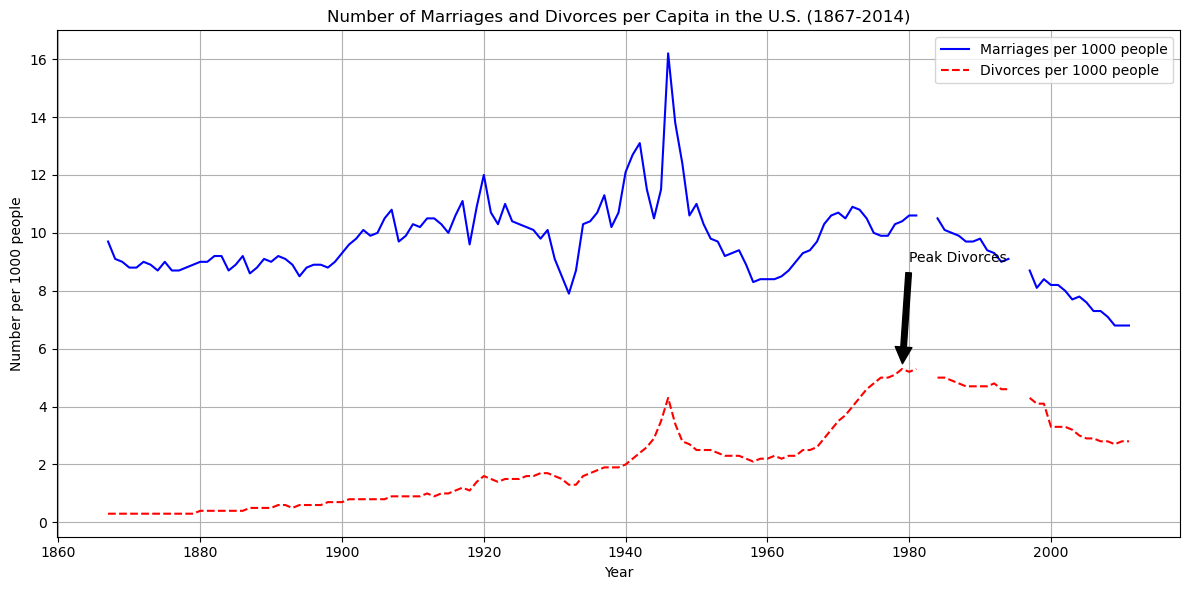

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_path = "C:/Users/praja/Documents/us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(data_path)

# Plotting the data
plt.figure(figsize=(12, 6))

# Plotting the number of marriages per capita
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000 people', color='blue', linestyle='-')

# Plotting the number of divorces per capita
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000 people', color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number per 1000 people')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')

# Adding legend
plt.legend()

# Adding grid
plt.grid(True)

# Adding annotation for significant events
plt.annotate('Peak Divorces', xy=(1979, data['Divorces_per_1000'].max()), xytext=(1980, 9),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Question 7

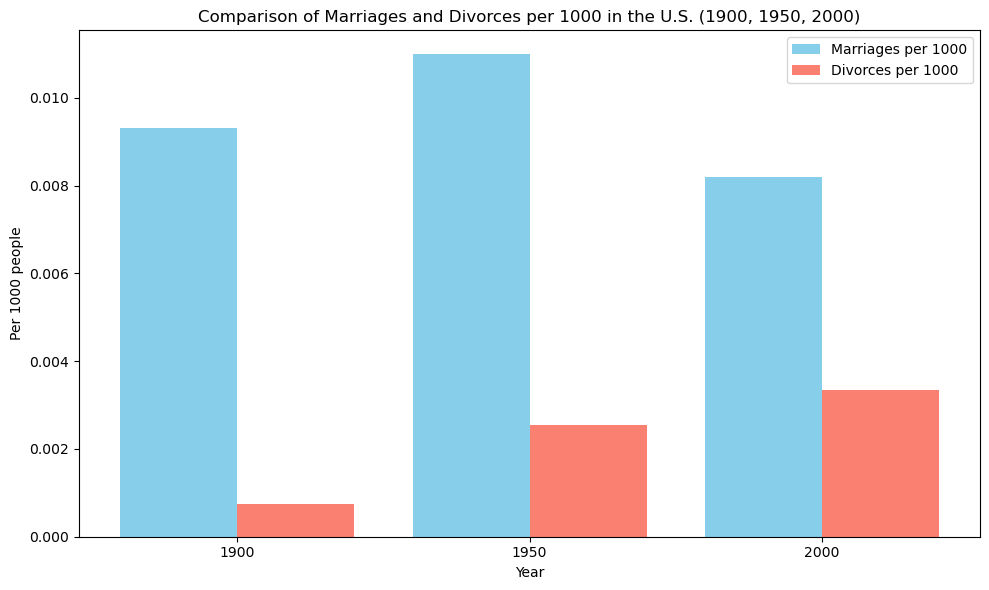

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_path = "C:/Users/praja/Documents/us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(data_path)

# Filter data for the years 1900, 1950, and 2000
years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)].copy()

# Calculate per 1000 values using .loc indexer
filtered_data.loc[:, 'Marriages_per_1000'] = filtered_data['Marriages'] / filtered_data['Population']
filtered_data.loc[:, 'Divorces_per_1000'] = filtered_data['Divorces'] / filtered_data['Population']

# Create the vertical bar chart
plt.figure(figsize=(10, 6))

x = filtered_data['Year']
marriages_per_1000 = filtered_data['Marriages_per_1000']
divorces_per_1000 = filtered_data['Divorces_per_1000']

bar_width = 20  # Adjusted bar width
plt.bar(x - bar_width/2, marriages_per_1000, width=bar_width, label='Marriages per 1000', color='skyblue')
plt.bar(x + bar_width/2, divorces_per_1000, width=bar_width, label='Divorces per 1000', color='salmon')

plt.xlabel('Year')
plt.ylabel('Per 1000 people')
plt.title('Comparison of Marriages and Divorces per 1000 in the U.S. (1900, 1950, 2000)')
plt.xticks(years)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Question 8

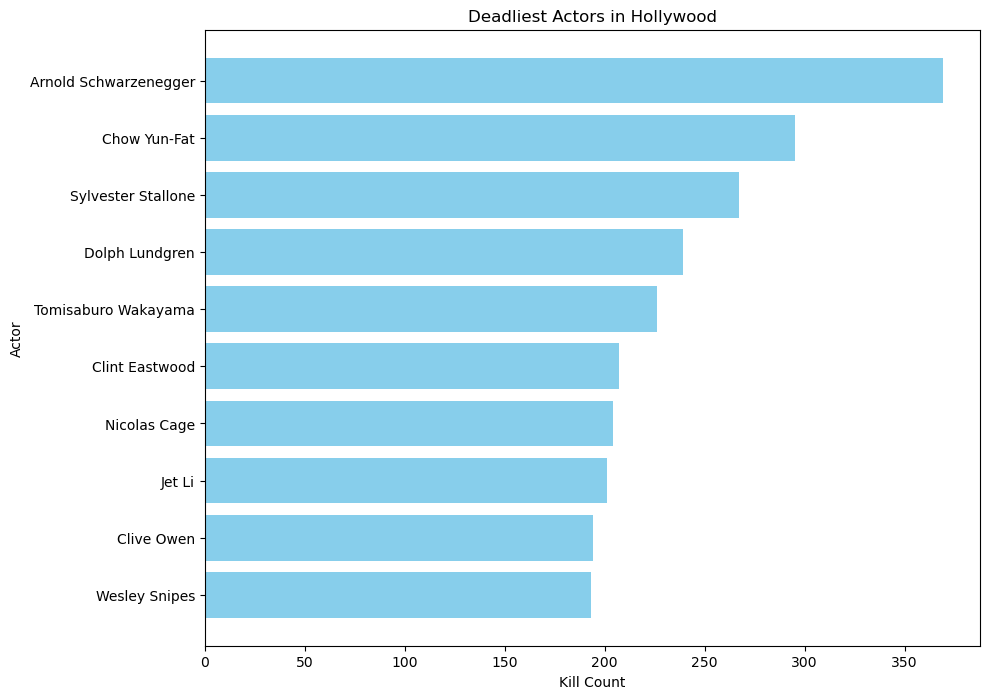

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:/Users/praja/Documents/actor_kill_counts.csv"
data = pd.read_csv(file_path)

# Sort the data by kill count in descending order
sorted_data = data.sort_values(by='Count', ascending=False)

# Plotting the data
plt.figure(figsize=(10, 8))

# Creating horizontal bar chart
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='skyblue')  # Adjusted color

# Adding labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Display the plot
plt.gca().invert_yaxis()  # Invert y-axis to display the highest kill count at the top
plt.show()

In [ ]:
# Question 9

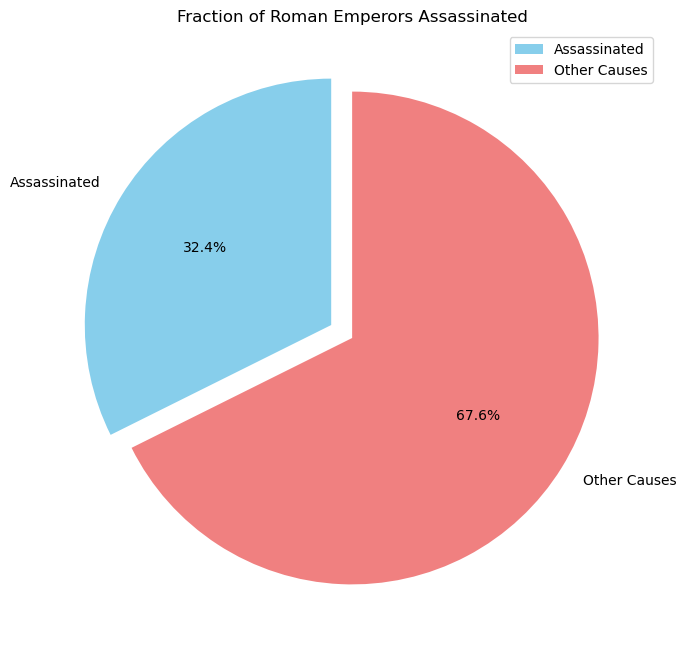

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:/Users/praja/Documents/roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

# Count the number of emperors who were assassinated
assassinated_count = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]

# Count the number of emperors who had other causes of death
other_count = data.shape[0] - assassinated_count

# Create data for the pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated_count, other_count]

# Plotting the data
plt.figure(figsize=(8, 8))

# Define colors
colors = ['skyblue', 'lightcoral']

# Explode the 'Assassinated' slice
explode = (0.1, 0)

# Creating pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Adding title
plt.title('Fraction of Roman Emperors Assassinated')

# Adding legend
plt.legend(loc="best")

# Display the plot
plt.show()


In [ ]:
# Question 10

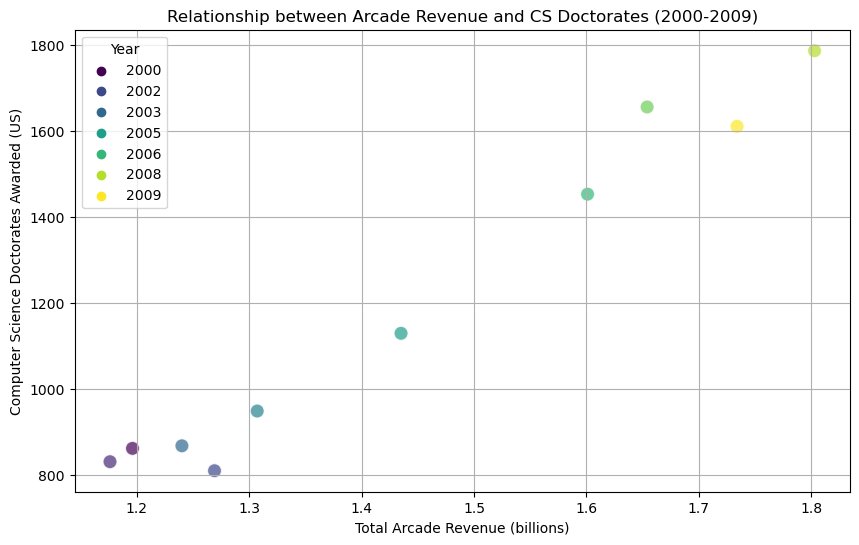

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:/Users/praja/Documents/arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)

# Plotting the data
plt.figure(figsize=(10, 6))

# Scatter plot with color-coded dots for each year
sns.scatterplot(
    x='Total Arcade Revenue (billions)',
    y='Computer Science Doctorates Awarded (US)',
    hue='Year',
    data=data,
    palette='viridis',
    s=100,  # Marker size
    alpha=0.7,  # Transparency
)

# Adding labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')
plt.grid(True)

# Display the plot
plt.show()